In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd

inp = sys.argv[1]

# hyper parameters
epoch = 1000 # how many times to repeat
lr = 0.001 # learning rate
train_data_ratio = 0.8 # train data 

#read data
df = pd.read_csv('Real_estate.csv')
df = df.drop('No', axis=1)
df = df.drop('X1 transaction date', axis=1)
df = df.drop('X3 distance to the nearest MRT station', axis=1)
data = df.values
print(data)

[[ 32.       10.       24.98298 121.54024  37.9    ]
 [ 19.5       9.       24.98034 121.53951  42.2    ]
 [ 13.3       5.       24.98746 121.54391  47.3    ]
 ...
 [ 18.8       7.       24.97923 121.53986  40.6    ]
 [  8.1       5.       24.96674 121.54067  52.5    ]
 [  6.5       9.       24.97433 121.5431   63.9    ]]


0 %
1 %
2 %
3 %
4 %
5 %
6 %
7 %
8 %
9 %
10 %
11 %
12 %
13 %
14 %
15 %


C:\Users\Muhammad Wasim\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in square
C:\Users\Muhammad Wasim\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in matmul


16 %
17 %
18 %
19 %
20 %
21 %
22 %
23 %
24 %
25 %
26 %
27 %
28 %
29 %
30 %
31 %
32 %
33 %
34 %
35 %
36 %
37 %
38 %
39 %
40 %
41 %
42 %
43 %
44 %
45 %
46 %
47 %
48 %
49 %
50 %
51 %
52 %
53 %
54 %
55 %
56 %
57 %
58 %
59 %
60 %
61 %
62 %
63 %
64 %
65 %
66 %
67 %
68 %
69 %
70 %
71 %
72 %
73 %
74 %
75 %
76 %
77 %
78 %
79 %
80 %
81 %
82 %
83 %
84 %
85 %
86 %
87 %
88 %
89 %
90 %
91 %
92 %
93 %
94 %
95 %
96 %
97 %
98 %
99 %
[[nan]
 [nan]
 [nan]
 [nan]] nan
average cost for test data :  nan


C:\Users\Muhammad Wasim\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


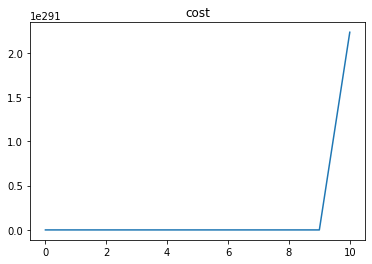

In [10]:

data_pivot = int(len(data)*train_data_ratio)
train_data = data[:data_pivot]
test_data = data[data_pivot:]

m = len(train_data) # number of data
k = len(train_data[0]) - 1 # number of dimension on x

x_train = [list(x)[:-1] for x in train_data]
y_train = [x[-1:] for x in train_data]

x_test = [list(x)[:-1] for x in test_data]
y_test = [x[-1:] for x in test_data]

# hypothesis = w1*x1 + w2*x2 + ... + wk*xk + b
w = np.random.rand(k, 1)
b = np.random.random()

cost_log = []
for i in range(epoch):
    pred = np.matmul(x_train, w) + b
    cost =  1/(2*m) * np.sum(np.square(np.subtract(pred, y_train)))
    # cost = (h-y_train)**2.mean()/2

    if i % (epoch//100) == 0:
        print(i//(epoch//100), "%")
        cost_log.append(cost)

    w_gradient = 1/m * np.sum(np.multiply(np.subtract(pred, y_train), x_train))
    b_gradient = 1/m * np.sum(np.subtract(pred, y_train))
    
    # update
    w -= lr * w_gradient
    b -= 2 * lr * b_gradient

# visualize
if k == 1:
    f1 = plt.figure(1)
    plt.title('graph of train data')
    plt.scatter(x_train, y_train)
    pred = np.matmul(x_train, w) + b
    plt.plot(x_train, pred, color='green')
    plt.xticks(())
    plt.yticks(())
    f1.show()


f2 = plt.figure(2)
plt.title('cost')
plt.plot(range(100), cost_log)
f2.show()

# cost for test data
pred = np.matmul(x_test, w) + b
cost =  1/(2*len(test_data)) * np.sum(np.square(np.subtract(pred, y_test)))
print("average cost for test data : ", cost)